## Methods
### Data Collection 

The dataset contains statistics on the world's billionaires. You can find the data on [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset/), an online resource for data science and machine learning competitions.

In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd



In [13]:
# read the csv file
df = pd.read_csv('BillionaresStatistics.csv')



### Data Cleaning


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

i want to look at the economic indicatiors and if there are any correlations betweeen wealth and economic indicators such as GDP, CPI, and tax rates? SO to clean my data set im going to clean empty indicators such as finalWorth and gdp_country, cpi_country, total_tax_rate_country.

In [15]:
df.dropna(subset=['finalWorth', 'gdp_country', 'cpi_country', 'total_tax_rate_country'], inplace=True)

# Check the remaining missing values
print("Missing values in finalWorth:", df["finalWorth"].isnull().sum())
print("Missing values in gdp_country:", df["gdp_country"].isnull().sum())
print("Missing values in cpi_country:", df["cpi_country"].isnull().sum())
print("Missing values in total_tax_rate_country:", df["total_tax_rate_country"].isnull().sum())

Missing values in finalWorth: 0
Missing values in gdp_country: 0
Missing values in cpi_country: 0
Missing values in total_tax_rate_country: 0


Also going to take a look at the wealth distrubtion alnalysis as in what industries are the richest, 
Generate a histogram or box plot of finalWorth to visualize the distribution.
Analyze the top industries or categories contributing to billionaires' wealth.

In [ ]:
df['age'].fillna(df['age'].median(), inplace=True)
df['birthYear'].fillna(df['birthYear'].median(), inplace=True)
# gender has no missing values

# since country na values are low we can drop them
df.dropna(subset=["country"],inplace=True) 

print(df["age"].isnull().sum())
print(df["birthYear"].isnull().sum())
df.dropna(subset=["birthDate"],inplace=True)
print(df["birthDate"].isnull().sum())
df.dropna(subset=["country"],inplace=True)
print(df["country"].isnull().sum())
print(df["country"].isnull().sum())

What are the demographics of billionaires in terms of age, gender, and birthplace?
Analysis Points:
Explore the distribution of age among billionaires.
Investigate the gender distribution (gender column).
Analyze birthplaces and citizenship countries.

In [19]:
# Check for duplicates
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check again for duplicates after removal
print("Number of duplicate rows after removal:", df.duplicated().sum())


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


## Analyses 
- A comprehensive analysis of billionaire demographics, including age distribution, gender distribution, and birthplaces/citizenship countries.
- An exploration of wealth distribution, focusing on the distribution of final worth and the top contributing industries/categories.
- Investigation of potential correlations between billionaire wealth and economic indicators


### Demographic Analysis 

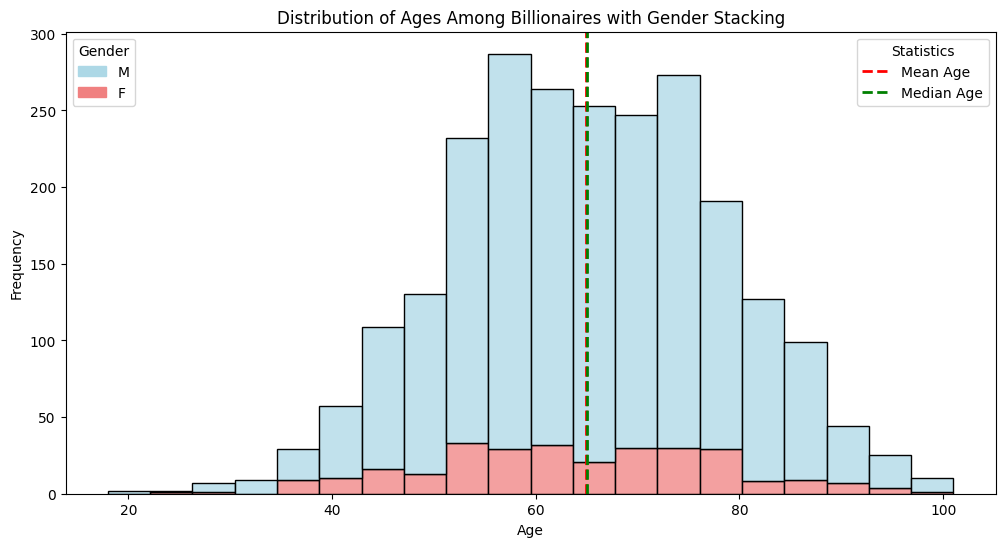

In [115]:
# Calculate mean, median, and mode of age
mean_age = df['age'].mean()
median_age = df['age'].median()
mode_age = df['age'].mode().values[0]

# Plot the age distribution with mean, median, and mode, stacked by gender
plt.figure(figsize=(12, 6))
sns.histplot(df, x='age', bins=20, hue='gender', multiple='stack', palette={'M': 'lightblue', 'F': 'lightcoral'})
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median Age: {median_age}')

plt.title('Distribution of Ages Among Billionaires with Gender Stacking')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Create separate legends for gender and statistics
legend_gender = plt.legend(loc='upper left',title='Gender', labels={'M': 'Male', 'F': 'Female'}, handles=[plt.Rectangle((0,0),1,1,color='lightblue'), plt.Rectangle((0,0),1,1,color='lightcoral')])
legend_stats = plt.legend(loc='upper right', title='Statistics', labels=['Mean Age', 'Median Age'])

# Add both legends to the plot
plt.gca().add_artist(legend_gender)
plt.show()


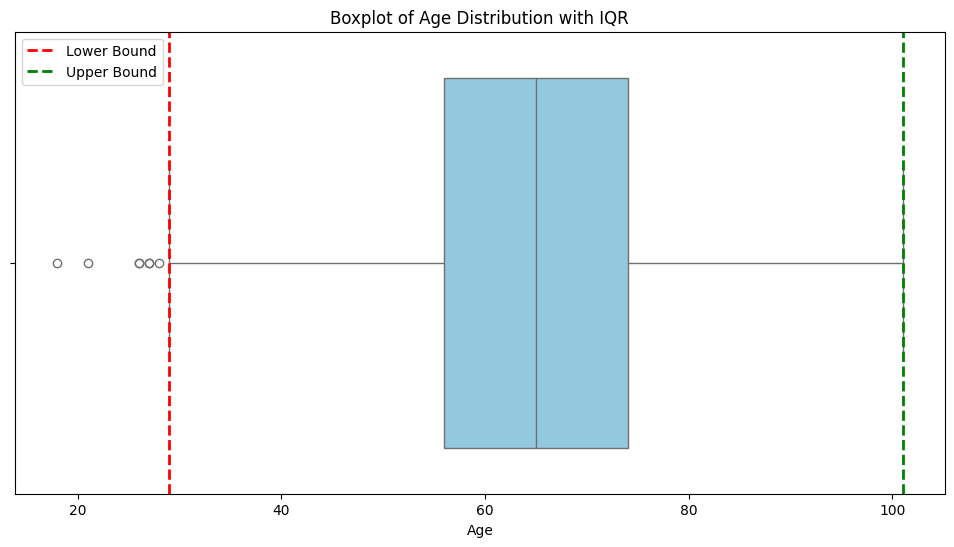

First Quartile (Q1): 56.0
Third Quartile (Q3): 74.0
Interquartile Range (IQR): 18.0


In [32]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Plot the age distribution with the IQR
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Boxplot of Age Distribution with IQR')
plt.xlabel('Age')

# Highlight the IQR on the plot
plt.axvline(Q1 - 1.5 * IQR, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
plt.axvline(Q3 + 1.5 * IQR, color='green', linestyle='dashed', linewidth=2, label='Upper Bound')

plt.legend()
plt.show()

# Print the calculated values
print(f'First Quartile (Q1): {Q1}')
print(f'Third Quartile (Q3): {Q3}')
print(f'Interquartile Range (IQR): {IQR}')

In [116]:
# Group by gender and calculate summary statistics
gender_grouped = df.groupby('gender')['age'].agg(['count', 'mean', 'median', 'min', 'max'])

display(gender_grouped)

,count,mean,median,min,max
gender,,,,,
F,283,63.706714,63.0,26.0,98.0
M,2114,65.125828,65.0,18.0,101.0


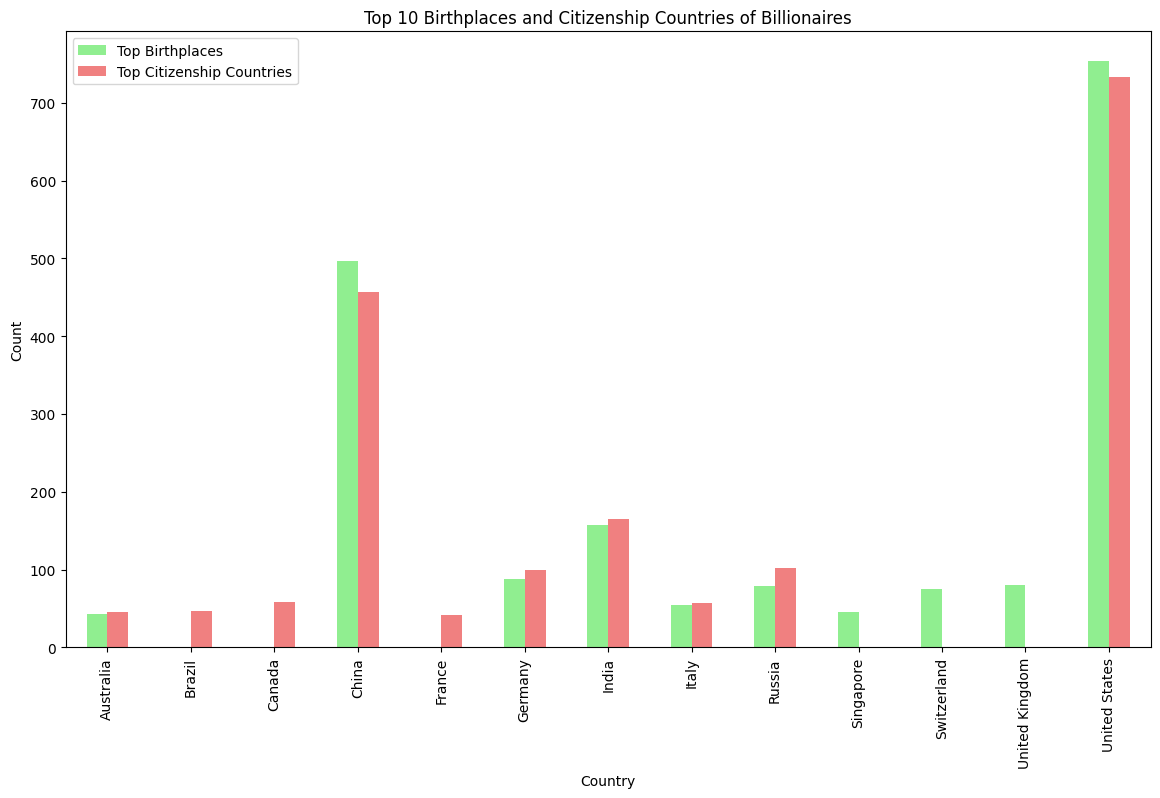

In [37]:
# Analyze the top birthplaces and citizenship countries of billionaires
top_birthplaces = df['country'].value_counts().head(10)
top_citizenships = df['countryOfCitizenship'].value_counts().head(10)

# Create a DataFrame for visualization
combined_df = pd.DataFrame({
    'Top Birthplaces': top_birthplaces,
    'Top Citizenship Countries': top_citizenships
})

# Plot the double bar graph
combined_df.plot(kind='bar', figsize=(14, 8), color=['lightgreen', 'lightcoral'])
plt.title('Top 10 Birthplaces and Citizenship Countries of Billionaires')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


In [53]:
# Group by birth country and citizenship and calculate counts
birthplace_grouped = df.groupby('country').size().reset_index(name='Birthplace Count')
citizenship_grouped = df.groupby('countryOfCitizenship').size().reset_index(name='Citizenship Count')

# Display the top birthplaces and citizenship countries
print("Top Birthplaces:")
display(birthplace_grouped.sort_values(by='Birthplace Count', ascending=False).head(10))

print("\nTop Citizenship Countries:")
display(citizenship_grouped.sort_values(by='Citizenship Count', ascending=False).head(10))

Top Birthplaces:


,country,Birthplace Count
61,United States,754
11,China,496
23,India,157
20,Germany,88
60,United Kingdom,80
47,Russia,79
54,Switzerland,75
26,Italy,55
48,Singapore,45
3,Australia,43



Top Citizenship Countries:


,countryOfCitizenship,Citizenship Count
67,United States,733
12,China,457
27,India,165
52,Russia,102
22,Germany,100
10,Canada,58
31,Italy,57
8,Brazil,47
3,Australia,46
20,France,41


### Wealth Distribution Analysis



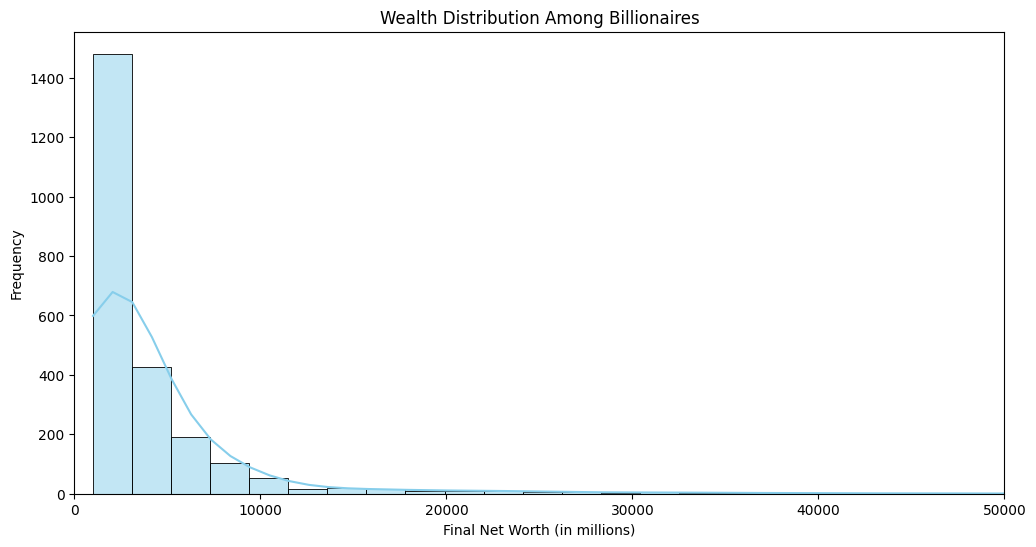

In [93]:
plt.figure(figsize=(12, 6))
sns.histplot(df['finalWorth'], bins=100, kde=True, color='skyblue')
plt.title('Wealth Distribution Among Billionaires')
plt.xlabel('Final Net Worth (in millions)')
plt.ylabel('Frequency')
max_value = 50000
plt.xlim(0, max_value)
plt.show()

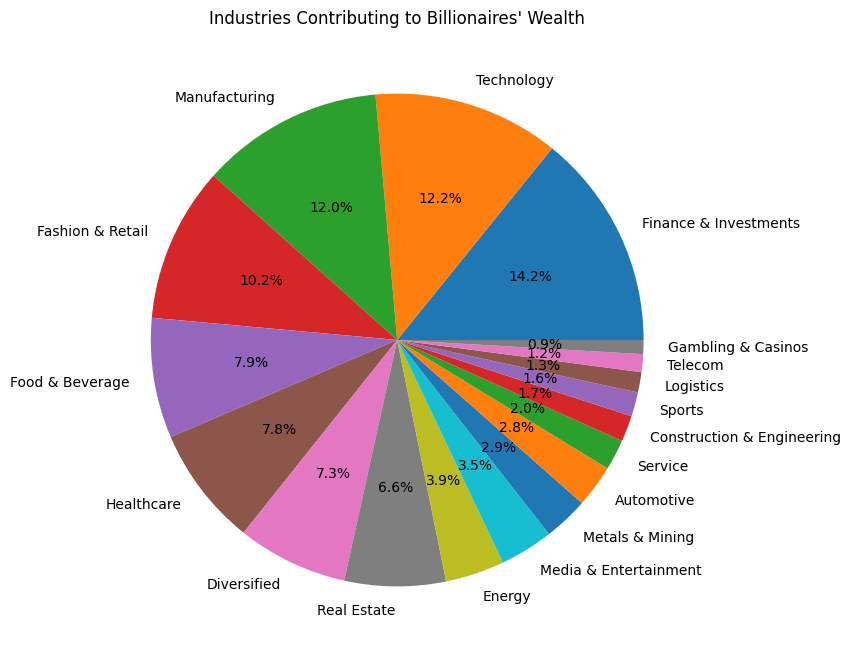

In [98]:
top_industries = df['category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(top_industries, labels=top_industries.index, autopct='%1.1f%%')
plt.title('Industries Contributing to Billionaires\' Wealth')
plt.ylabel('')
plt.show()

### Economic Indicators Analysis

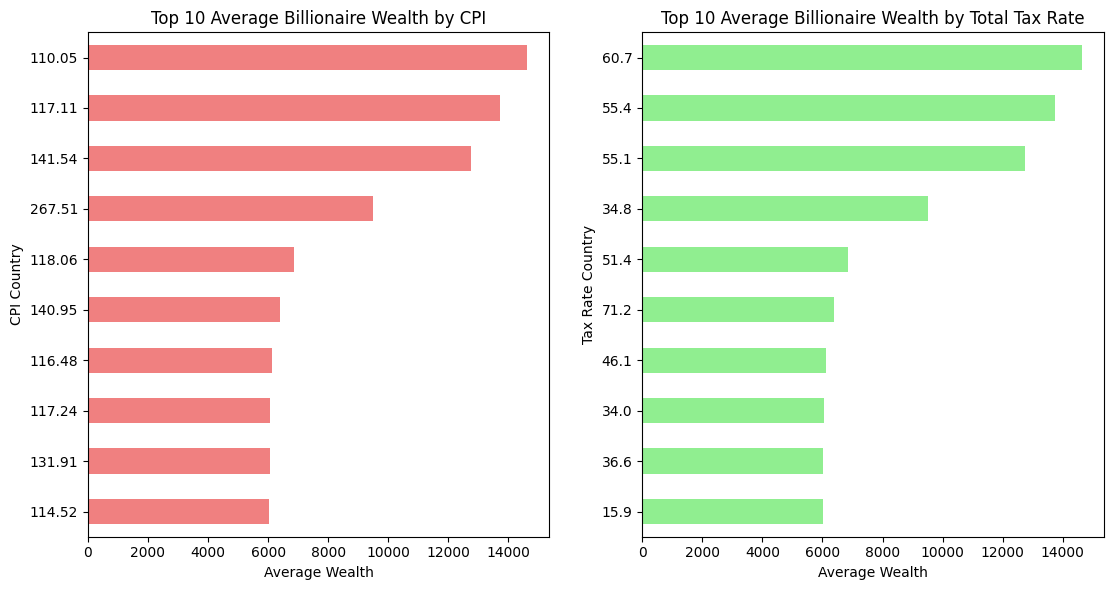

In [79]:
# Group by economic indicators and calculate average billionaire wealth
top_wealth_gdp = df.groupby('gdp_country')['finalWorth'].mean().nlargest(10)
top_wealth_cpi = df.groupby('cpi_country')['finalWorth'].mean().nlargest(10)
top_wealth_tax_rate = df.groupby('total_tax_rate_country')['finalWorth'].mean().nlargest(10)

# Plot the top 10 average billionaire wealth for each economic indicator using horizontal bar charts
plt.figure(figsize=(16, 6))


plt.subplot(1, 3, 2)
top_wealth_cpi.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Top 10 Average Billionaire Wealth by CPI')
plt.xlabel('Average Wealth')
plt.ylabel('CPI Country')

plt.subplot(1, 3, 3)
top_wealth_tax_rate.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Top 10 Average Billionaire Wealth by Total Tax Rate')
plt.xlabel('Average Wealth')
plt.ylabel('Tax Rate Country')

plt.tight_layout()
plt.show()
